In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# plt.style.use('seaborn')
sns.set(font_scale = 2.5)

import missingno as msno

import warnings
warnings.filterwarnings('ignore')

Essential Importing

In [3]:
df_train = pd.read_csv("E:\\GithubProjects\\KagglePractice\\Titanic-OnMyOwn\\train.csv")
df_test = pd.read_csv("E:\\GithubProjects\\KagglePractice\\Titanic-OnMyOwn\\test.csv")

In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Reading data by csv and checking data

In [5]:
df_train = df_train.replace("male", 0)
df_train = df_train.replace("female", 1)

df_test = df_test.replace("male", 0)
df_test = df_test.replace("female", 1)

Change str("male") to 0 and change str("female") to 1

Female : 1
Male : 0

In [6]:
print("NullCount")
df_train.agg(lambda x : sum(x.isnull()))

NullCount


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Check nan of data

<AxesSubplot: xlabel='Pclass'>

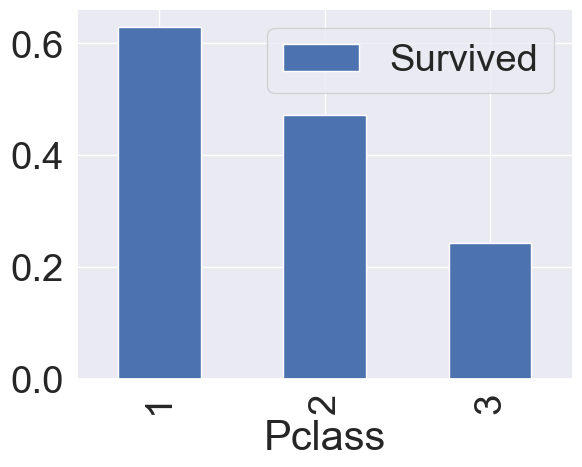

In [7]:
df_train[['Pclass', 'Survived']].groupby(
	['Pclass'], as_index=True
).mean().sort_values(
	by='Survived', ascending=False #ascending = 오름차순
).plot.bar()

# According to this plot bar, Survivors are realted to the 'Pclass'

as_index=False
Pclass	Survived
0	1	0.629630
1	2	0.472826
2	3	0.242363

as_index=True
	Survived
Pclass	
1	0.629630
2	0.472826
3	0.242363

<AxesSubplot: xlabel='Sex'>

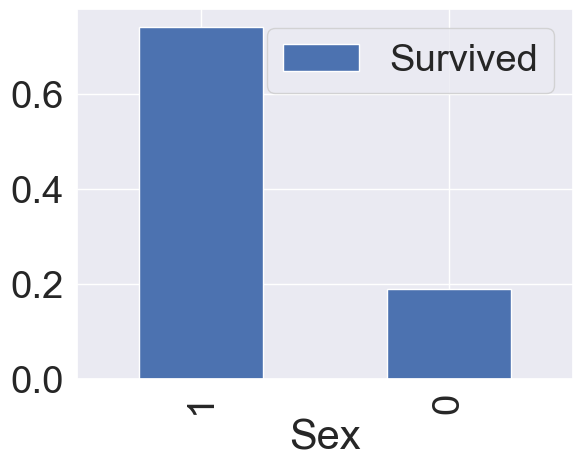

In [13]:
df_train[['Sex', 'Survived']].groupby(
	['Sex'], as_index=True
).mean().sort_values(
	by='Survived', ascending=False #ascending = 오름차순
).plot.bar()

# According to this plot bar, Survivors are realted to the 'Sex'
# 	Survived
# Sex	
# 0	0.188908 ( Male )
# 1	0.742038 ( Female )

<AxesSubplot: xlabel='SibSp'>

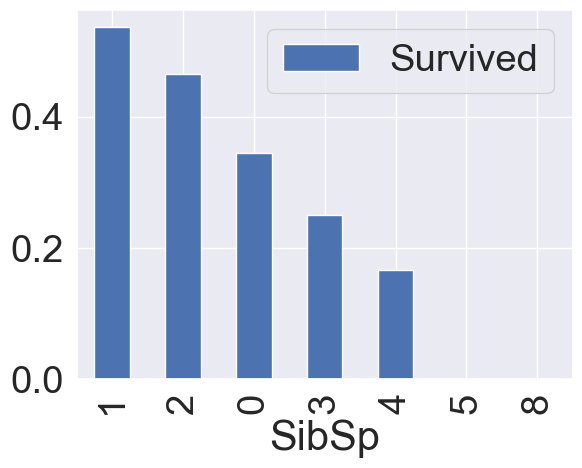

In [11]:
df_train[['SibSp', 'Survived']].groupby(
	['SibSp'], as_index=True
).mean().sort_values(
	by='Survived', ascending=False #ascending = 오름차순
).plot.bar()

# According to this plot bar, Survivors are realted to the 'SibSp'

# 	Survived
# SibSp	
# 0	0.345395
# 1	0.535885
# 2	0.464286
# 3	0.250000
# 4	0.166667
# 5	0.000000
# 8	0.000000

<AxesSubplot: xlabel='Parch'>

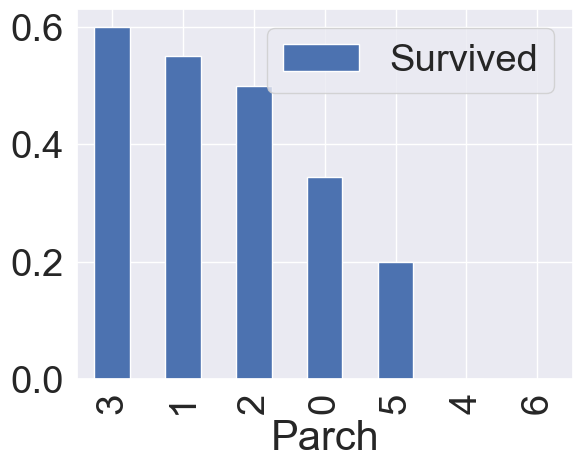

In [15]:
df_train[['Parch', 'Survived']].groupby(
	['Parch'], as_index=True
).mean().sort_values(
	by='Survived', ascending=False #ascending = 오름차순
).plot.bar()


# Survived
# Parch	
# 0	0.343658
# 1	0.550847
# 2	0.500000
# 3	0.600000
# 4	0.000000
# 5	0.200000
# 6	0.000000

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


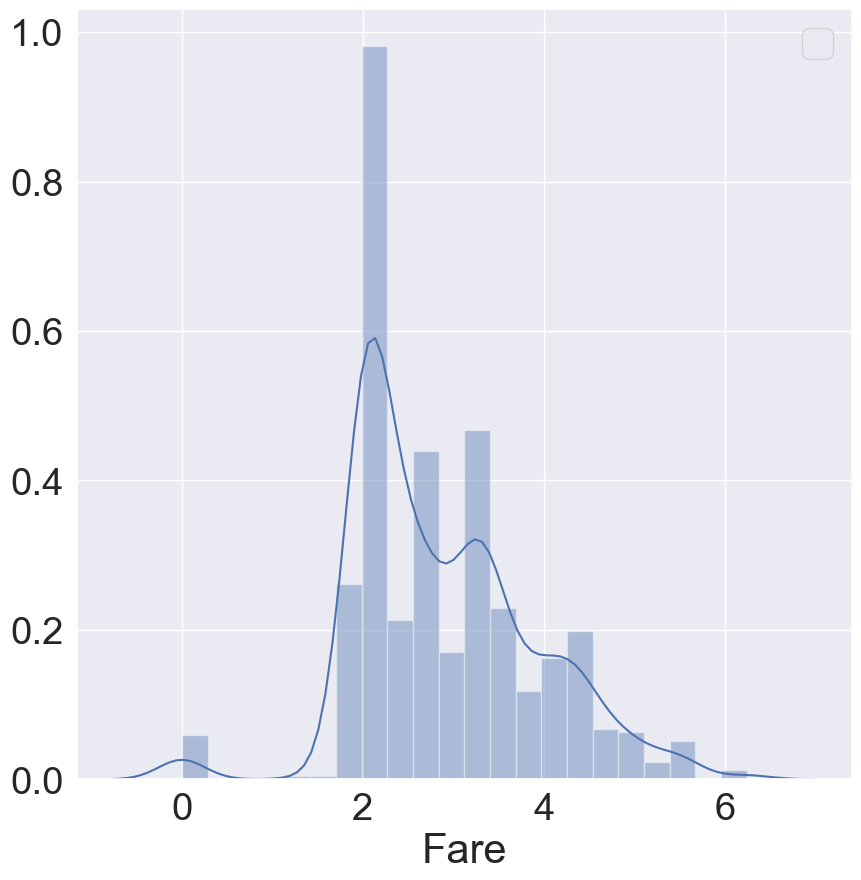

In [28]:
CustomValue = df_train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

f, ax = plt.subplots(1, 1, figsize=(10 ,10))
g = sns.distplot(CustomValue, color='b', ax = ax)
# g = sns.distplot(df_train['Survived'], color='r', ax = ax)
g = g.legend(loc='best')

# Log 나 일반 값과 Survived 의 연관성 찾아보기가 필요함